<a href="https://colab.research.google.com/github/JMGO-coding/MLX_academic_performance/blob/main/src/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *PROJECT TASK*

The goal of practical project is to explain, using all techniques explained in class, the ML
models assigned.
At least each team must explain 2 ML models (a.k.a. compulsory models). Additionally,
the team can build and explain a third model (a.k.a. extra model).

The Practical Project will consist of:

- Python 2 or 3 notebooks: ipynb file for each model.
- Dataset: csv file or online load hardcoded.

Each notebook must include:

- Markdown use:
    - Sections and subsections numbered (using #, ##, etc.)
    - Concise and clear descriptions of the decisions made
    - Concise and clear conclusions of the explanations obtained.

- The code must be clear and must include comments.
- The notebook must include 3 sections (you can add subsections):

1. Dataset load and preparation
2. ML model training
3. ML explanation

The ML explanation, section 3, is the most important part of the project. Here you should
cover:

- Use any explanation method useful that you’ve seen on class.
- Provide individual explanations of instance. Not just plots, but the conclusions
you can make.
- Provide global explanations of the ML model. Not just plots, but the conclusions
you can make.

# Machine Learning Explicable. Explicación de un MODEL_TYPE.

## 0. Requerimientos y funciones auxiliares

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
#import supertree

import os
import sys
import datetime

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
#from skopt import BayesSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import OneHotEncoder
import sklearn.impute as impute

from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import plot_tree

from sklearn.pipeline import Pipeline
from scipy import stats

# Regresión

# Preprocesamiento
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

from sklearn.decomposition import PCA

# Desbalanceo
#from imblearn.over_sampling import SVMSMOTE, RandomOverSampler, ADASYN
#from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour
#from imblearn.ensemble import RUSBoostClassifier
#from sklearn.svm import OneClassSVM

# Modelos de clasificación

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBRegressor
import joblib

# TODO: Explicabilidad: SHAP, LIME


In [3]:
!git clone https://github.com/JMGO-coding/MLX_academic_performance.git
!cd MLX_academic_performance/

Cloning into 'MLX_academic_performance'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 49 (delta 12), reused 4 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (49/49), 1.64 MiB | 5.24 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [4]:
import sys

# Añadir los directorio fuentes al path de Python
sys.path.append('/content/MLX_academic_performance')
#sys.path.append('/content/MLX_academic_performance/src')

# Verificar que se han añadido correctamente
print(sys.path)

['/content', '/env/python', '/usr/lib/python311.zip', '/usr/lib/python3.11', '/usr/lib/python3.11/lib-dynload', '', '/usr/local/lib/python3.11/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.11/dist-packages/IPython/extensions', '/root/.ipython', '/content/MLX_academic_performance']


In [5]:
def save_model(model, model_path="models/best_model_DT.pkl"):
    """
    Guarda un modelo un archivo pkl.
    """
    joblib.dump(model, model_path)

In [6]:
def load_model(model_path="models/best_model_DT.pkl"):
    """
    Carga un modelo previamente guardado desde un archivo.
    """
    return joblib.load(model_path)

## 1. Carga y preprocesamiento del dataset

### 1.1. Primeras visualizaciones y estadísticas

In [7]:
# Fijamos la semilla y los directorios

SEED = 2024
directory = './'
plots_directory = directory + 'plots/'
data_directory = directory + 'data/'
data_directory = "/content/MLX_academic_performance/data/"


In [8]:
# Lectura del Dataset y primera visualziación

data_file = 'data.csv'
data_path = data_directory + data_file
df= pd.read_csv(data_path, sep=';')
print(df.shape)
df.head()

(4424, 37)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [9]:
df.info()   # Conteo de no-nulos y data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [10]:
df.describe()   # Estadísticos básicos sobre los features numéricos del dataset

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


El dataset no contiene valores nulos.

In [11]:
# Variables según su tipo

categorical_features = ['Marital status', 'Application mode', 'Course', 'Nacionality', 'Mother\'s occupation', 'Father\'s occupation']

numerical_features = ['Application order', 'Previous qualification', 'Previous qualification (grade)',
                      'Mother\'s qualification',  'Father\'s qualification', 'Admission grade', 'Age at enrollment',
                      'Curricular units 1st sem (credited)',  'Curricular units 1st sem (enrolled)',  'Curricular units 1st sem (evaluations)',
                      'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',  'Curricular units 1st sem (without evaluations)',
                      'Curricular units 2nd sem (credited)',  'Curricular units 2nd sem (enrolled)',  'Curricular units 2nd sem (evaluations)',
                      'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)',  'Curricular units 2nd sem (without evaluations)',
                      'Unemployment rate', 'Inflation rate', 'GDP'
                    ]
binary_features = ['Daytime/evening attendance\t', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender',
                   'Scholarship holder', 'International']

target_feature = 'Target' # Categorical 3 classes

Selección de caracterísitcas (opcional, por defecto NO)

In [12]:
selection = False

if selection:
  # Selección de características para la etiqueta actual
  selector = SelectKBest(f_classif, k='all')
  selector.fit(X, y['Target'])

Eliminación de outliers (opcional, por defecto NO)

In [13]:
outliers = False

if outliers:
  # Creamos un DataFrame con las puntuaciones promediadas
  features_df = pd.DataFrame({
      "Feature": X.columns,
      "Score": selector.scores_
  }).sort_values(by="Score", ascending=False)

  print(features_df)

  # Filtramos por umbral
  threshold = 5  # Puntuación mínima aceptable
  selected_features = features_df[features_df["Score"] > threshold]["Feature"]

  # Creamos nuevos conjuntos de datos con las características seleccionadas
  X_train = X_train[selected_features]
  X_test = X_test[selected_features]

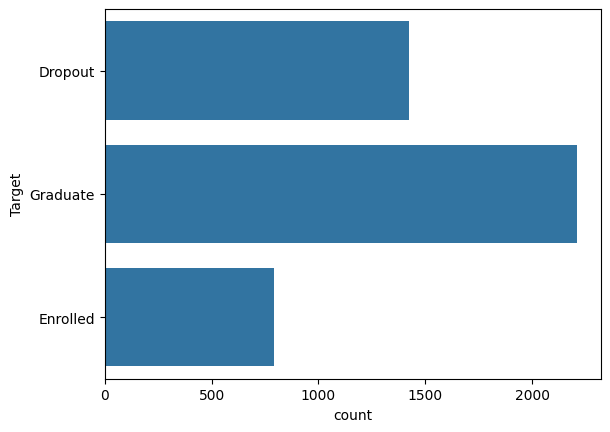

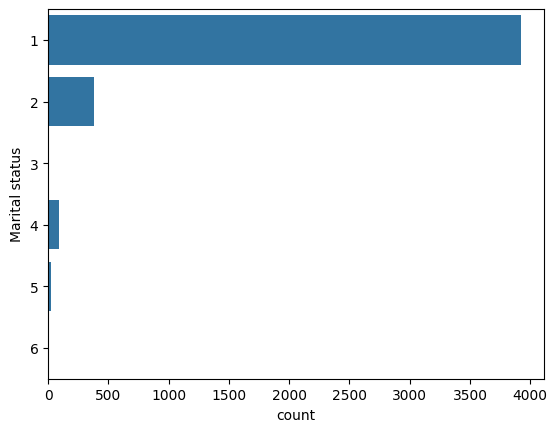

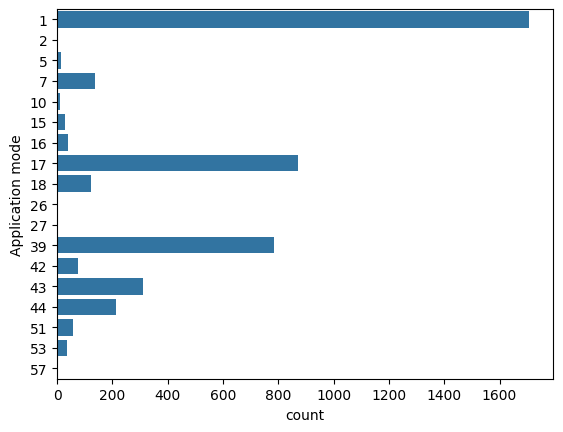

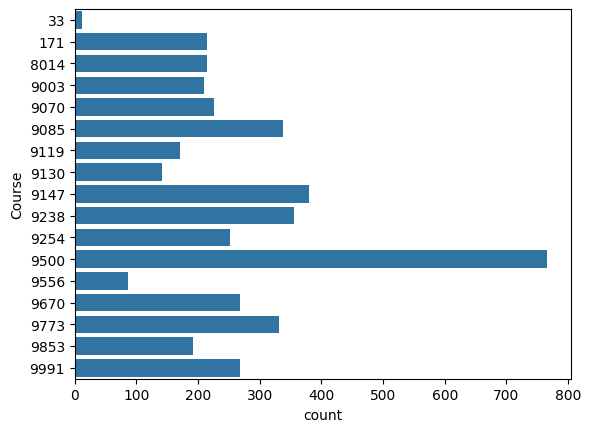

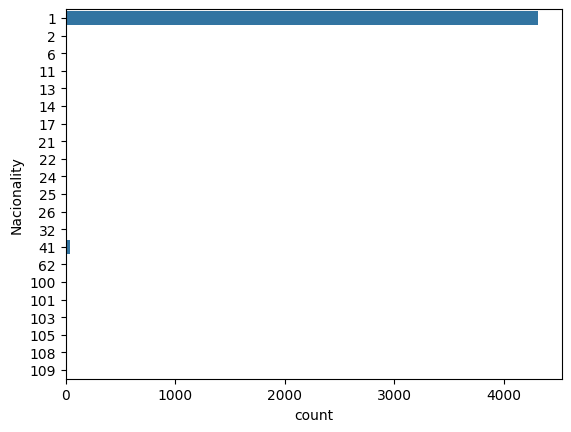

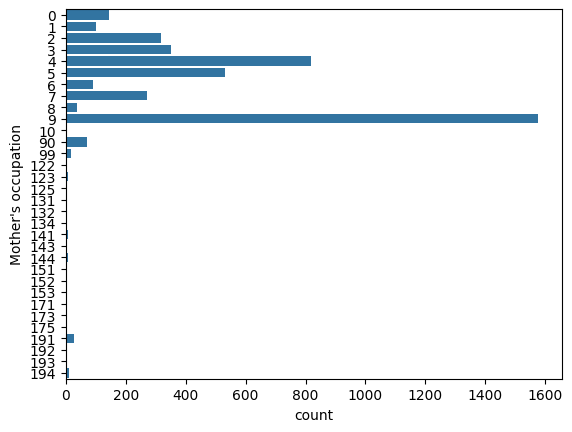

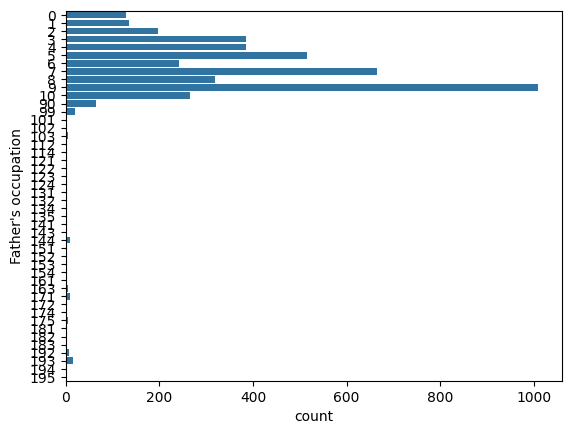

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


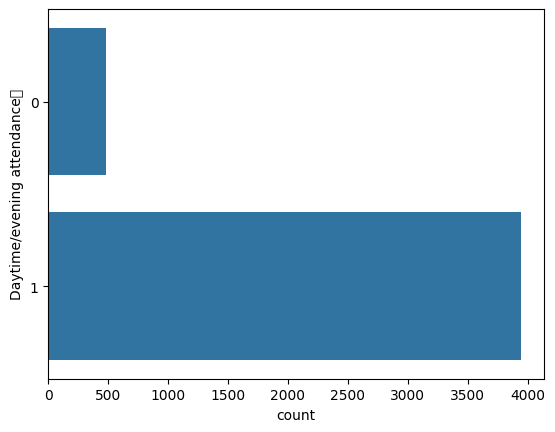

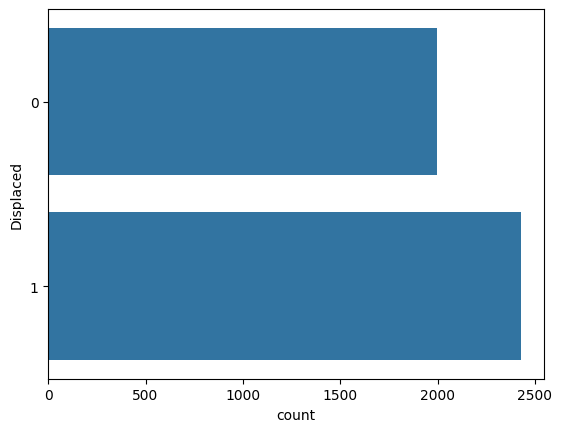

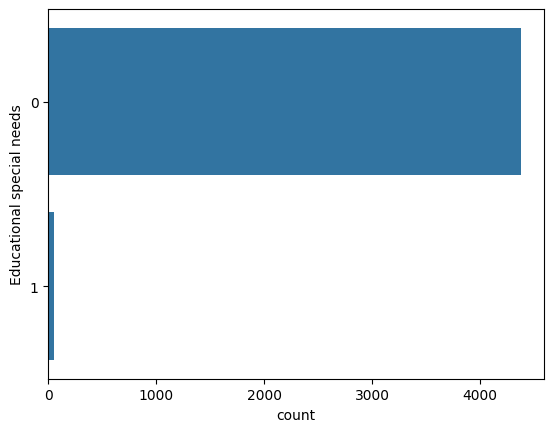

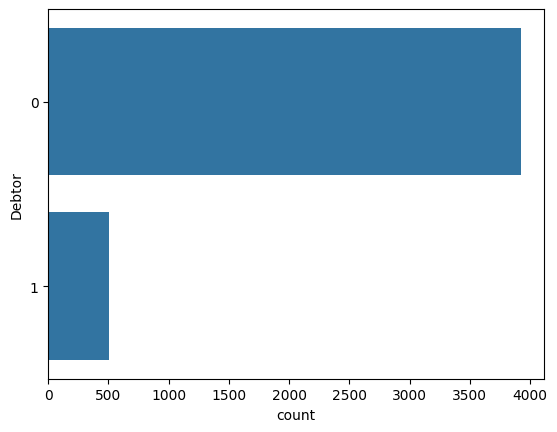

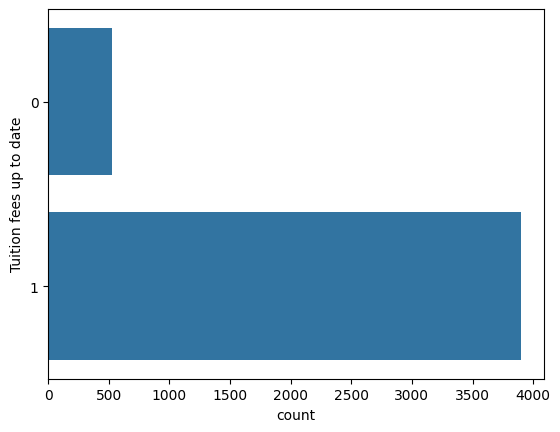

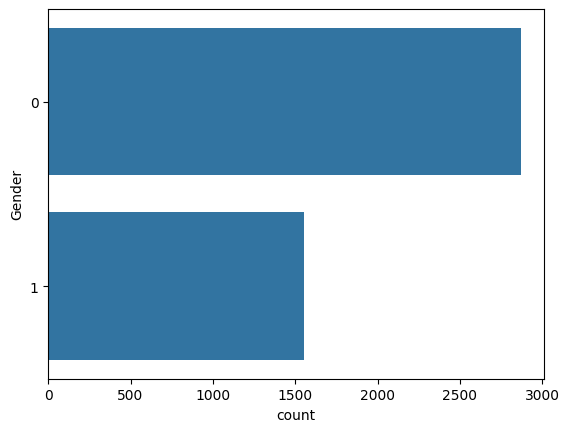

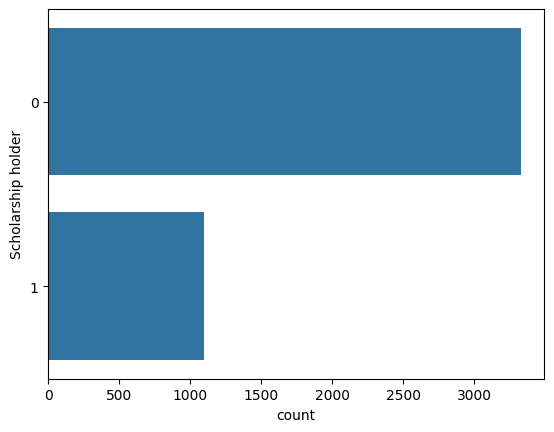

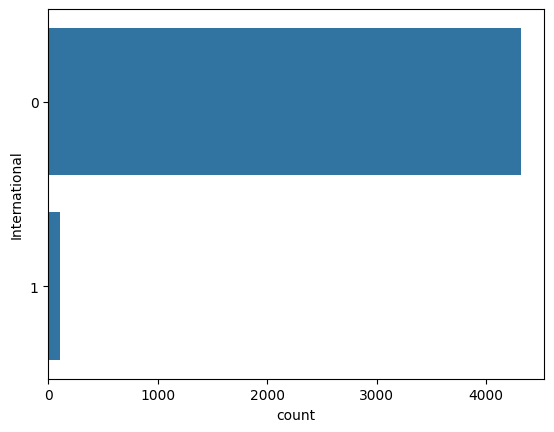

In [14]:
# Histograma variables categóricas

for feature in [target_feature] + categorical_features + binary_features:
    sns.countplot(y=feature, data=df)
    plt.show()

<ipython-input-15-cdb2d563b2df>:21: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


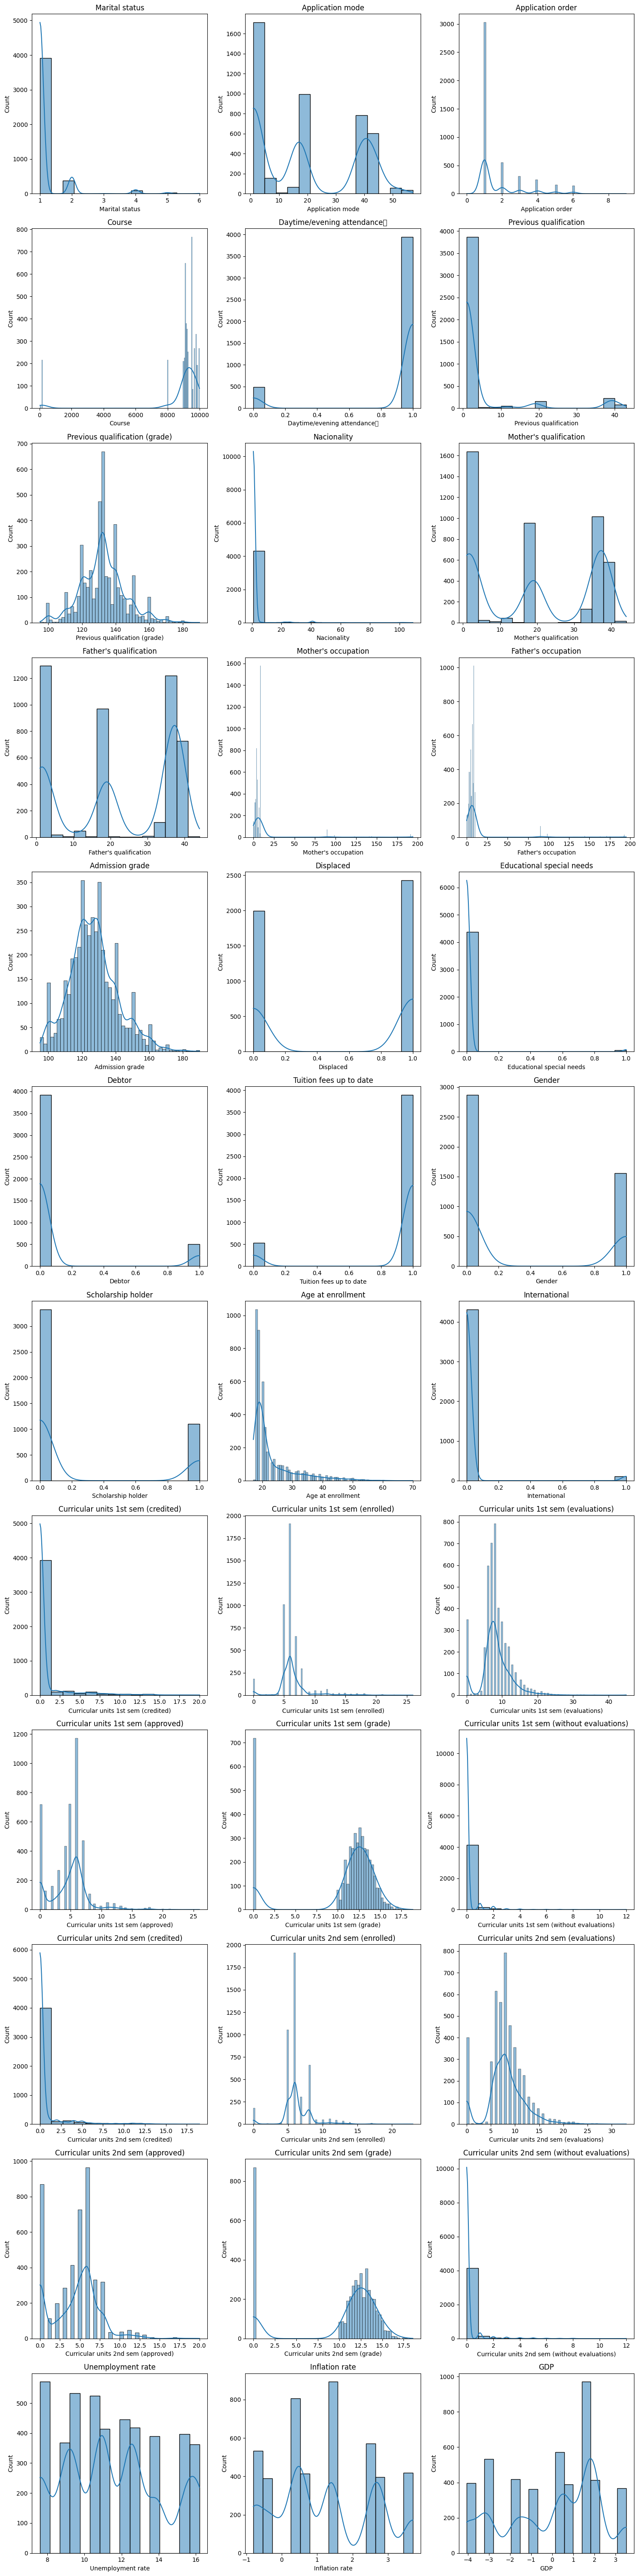

In [15]:
# Lista de características numéricas
numerical_features = df.select_dtypes(include=['number']).columns

# Definir el número de columnas y calcular el número de filas
num_cols = 3
num_rows = math.ceil(len(numerical_features) / num_cols)

# Crear la figura y los ejes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Aplanar para facilitar la iteración

# Graficar cada característica
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(feature)

# Eliminar ejes vacíos si hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 1.2. partición de los datos en *Train* y *Test*

In [16]:
X = df.drop(columns=['Target'])
y = df['Target']
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=SEED)

## 2. Entrenamiento del modelo (Decision Tree)

In [17]:
# Ejecutamos un Grid search y nos quedamos con el modelod e mejores hiperparámetros

param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [3, 5, 7, 10, 15, 20, 25, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5]
    }

dt = DecisionTreeClassifier(random_state=SEED)
grid_search = GridSearchCV(dt, param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Mejores parámetros:", grid_search.best_params_)
print("F1-score en test:", f1)

Mejores parámetros: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5}
F1-score en test: 0.7285586037868924


## 3. Explicación del modelo

Comenzamos visualizando el árbol

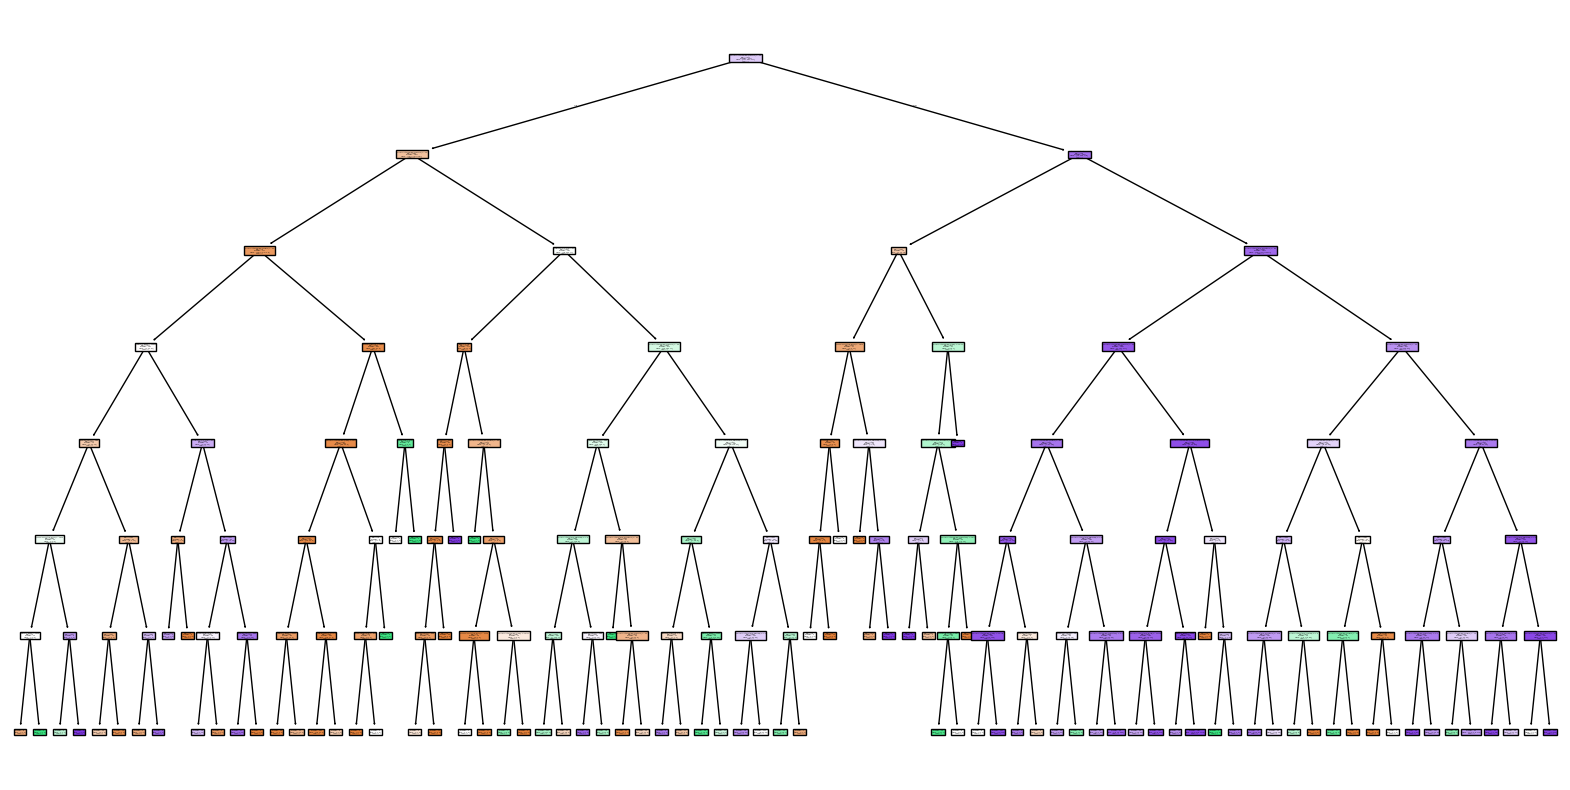

In [20]:
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X_train.columns, class_names=["0","1","2"], filled=True)
plt.ion()
plt.show()

In [21]:
! pip install supertree

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.5/321.5 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.1 MB/s eta 0:00:00
  Created wheel for supertree: filename=supertree-0.5.5-py3-none-any.whl size=223913 sha256=89f43e332ece85dcf26f8e2b82aa8ed39a1a69c91af6b8d4dde0c5f804fb3732
  Stored in directory: /root/.cache/pip/wheels/30/fc/93/9eff5a1b43c7f8e466706f65ece2ad4f80af9a634e12c950a3
Successfully built supertree


In [28]:
from supertree import SuperTree

In [30]:
# Inicializa SuperTree con tu mejor modelo
feature_names = X_train.columns.tolist()  # Convert Index to list
target_names = ['Dropout', 'Graduate', 'Enrolled']
super_tree = SuperTree(best_model, X_train, y_train, feature_names, target_names)

# Muestra el árbol en el notebook
super_tree.show_tree()

KeyError: 0